In [209]:
# Libraries 
import pyreadr
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [199]:
# Load the .rda file
result = pyreadr.read_r('/Users/elizabethkovalchuk/Documents/DSAN6000/Project/fall-2024-project-team-35/data/HINTS6_R_20240524/hints6_public.rda')

# Extract the DataFrame from the loaded data
hints = result['public']  # Assuming 'public' is the name of the R object in the file

# Specify the columns to select
columns = [
    "HHID", "SeekCancerInfo", "CancerFrustrated", "CancerTrustDoctor",
    "CancerTrustFamily", "CancerTrustGov", "CancerTrustCharities",
    "CancerTrustReligiousOrgs", "CancerTrustScientists", "Electronic2_HealthInfo",
    "MisleadingHealthInfo", "TrustHCSystem"
]

# Select the relevant columns
hints_select = hints[columns]

# # Convert the 'updatedate' column if required (commented for now)
# hints_select['updatedate'] = pd.to_datetime(hints_select['updatedate'] / 1000, unit='s')

# Preview the first few rows
print("Sample data from the HINTS dataset:")
display(hints_select.head())
print(f"Shape of the original dataset: {hints_select.shape}")



Sample data from the HINTS dataset:


,HHID,SeekCancerInfo,CancerFrustrated,CancerTrustDoctor,CancerTrustFamily,CancerTrustGov,CancerTrustCharities,CancerTrustReligiousOrgs,CancerTrustScientists,Electronic2_HealthInfo,MisleadingHealthInfo,TrustHCSystem
0,21000006,No,"Inapplicable, coded 2 in SeekCancerInfo",A lot,Missing data (Not Ascertained),Missing data (Not Ascertained),Missing data (Not Ascertained),Missing data (Not Ascertained),Missing data (Not Ascertained),Question answered in error (Commission Error),I do not use social media,Very
1,21000009,No,"Inapplicable, coded 2 in SeekCancerInfo",A lot,Some,A lot,Some,Some,A lot,Yes,I do not use social media,Very
2,21000020,Yes,Somewhat disagree,A lot,Some,Some,A little,Not at all,A lot,Yes,Some,Somewhat
3,21000022,No,"Inapplicable, coded 2 in SeekCancerInfo",A lot,Missing data (Not Ascertained),Missing data (Not Ascertained),Missing data (Not Ascertained),Missing data (Not Ascertained),Missing data (Not Ascertained),"Inapplicable, coded 2 in UseInternet",I do not use social media,Somewhat
4,21000039,No,"Inapplicable, coded 2 in SeekCancerInfo",Some,Some,Some,Not at all,Not at all,Some,Yes,A lot,Somewhat


Shape of the original dataset: (6252, 12)


In [200]:
# Count missing values in each column
missing_values = hints_select.isna().sum()

# Display the count of missing values
print("Missing values per column:")
display(missing_values)


Missing values per column:


HHID                        0
SeekCancerInfo              0
CancerFrustrated            0
CancerTrustDoctor           0
CancerTrustFamily           0
CancerTrustGov              0
CancerTrustCharities        0
CancerTrustReligiousOrgs    0
CancerTrustScientists       0
Electronic2_HealthInfo      0
MisleadingHealthInfo        0
TrustHCSystem               0
dtype: int64

In [201]:
# List of ordinal columns
ordinal_columns = [
    "SeekCancerInfo", "CancerFrustrated", "CancerTrustDoctor",
    "CancerTrustFamily", "CancerTrustGov", "CancerTrustCharities",
    "CancerTrustReligiousOrgs", "CancerTrustScientists", "Electronic2_HealthInfo",
    "MisleadingHealthInfo", "TrustHCSystem"
]

# Display unique values for each ordinal column
print("Unique values for ordinal columns:")
for column in ordinal_columns:
    unique_values = hints_select[column].unique()
    print(f"\nColumn: {column}")
    print(f"Unique Values: {unique_values}")


Unique values for ordinal columns:

Column: SeekCancerInfo
Unique Values: ['No', 'Yes', 'Missing data (Not Ascertained)']
Categories (3, object): ['Missing data (Not Ascertained)', 'No', 'Yes']

Column: CancerFrustrated
Unique Values: ['Inapplicable, coded 2 in SeekCancerInfo', 'Somewhat disagree', 'Strongly disagree', 'Somewhat agree', 'Strongly agree', 'Question answered in error (Commission Error)', 'Missing data (Filter Missing)', 'Missing data (Not Ascertained)', 'Multiple responses selected in error']
Categories (9, object): ['Inapplicable, coded 2 in SeekCancerInfo', 'Missing data (Filter Missing)', 'Missing data (Not Ascertained)', 'Multiple responses selected in error', ..., 'Somewhat agree', 'Somewhat disagree', 'Strongly agree', 'Strongly disagree']

Column: CancerTrustDoctor
Unique Values: ['A lot', 'Some', 'Not at all', 'A little', 'Missing data (Not Ascertained)', 'Multiple responses selected in error']
Categories (6, object): ['A little', 'A lot', 'Missing data (Not Asce

In [202]:
# Define the valid scales for each column
valid_scales = {
    "CancerFrustrated": ['Somewhat disagree', 'Strongly disagree', 'Somewhat agree', 'Strongly agree'],
    "CancerTrustDoctor": ['A lot', 'Some', 'Not at all', 'A little'],
    "CancerTrustFamily": ['A lot', 'Some', 'Not at all', 'A little'],
    "CancerTrustGov": ['A lot', 'Some', 'Not at all', 'A little'],
    "CancerTrustCharities": ['A lot', 'Some', 'Not at all', 'A little'],
    "CancerTrustReligiousOrgs": ['A lot', 'Some', 'Not at all', 'A little'],
    "CancerTrustScientists": ['A lot', 'Some', 'Not at all', 'A little'],
    "TrustHCSystem": ['A lot', 'Some', 'Not at all', 'A little'],
    "Electronic2_HealthInfo": ['Yes', 'No'], 
    "MisleadingHealthInfo": ['I do not use social media', 'None', 'A little', 'Some', 'A lot']  
}

# Create a copy of the original DataFrame
hints_cleaned = hints_select.copy()

# Filter the DataFrame
for column, scale in valid_scales.items():
    hints_cleaned = hints_cleaned[hints_cleaned[column].isin(scale)]

# Display the cleaned dataset and its shape
print("Data after filtering invalid values:")
display(hints_cleaned.head())
print(f"Shape of the cleaned dataset: {hints_cleaned.shape}")

Data after filtering invalid values:


,HHID,SeekCancerInfo,CancerFrustrated,CancerTrustDoctor,CancerTrustFamily,CancerTrustGov,CancerTrustCharities,CancerTrustReligiousOrgs,CancerTrustScientists,Electronic2_HealthInfo,MisleadingHealthInfo,TrustHCSystem
51,21000330,Yes,Somewhat disagree,Some,Not at all,Some,Some,Not at all,A lot,Yes,A lot,A little
112,21000976,Yes,Somewhat agree,A lot,Some,Some,Some,Some,A lot,Yes,Some,A little
136,21001112,Yes,Somewhat disagree,A little,A little,Not at all,Not at all,Not at all,A little,No,A lot,Not at all
157,21001283,Yes,Somewhat disagree,A lot,Some,Not at all,A little,Some,Not at all,No,I do not use social media,Not at all
181,21001548,Yes,Strongly agree,A lot,Some,Not at all,Some,A lot,A little,Yes,Some,A little


Shape of the cleaned dataset: (323, 12)


In [203]:
# Count unique values in the 'SeekCancerInfo' column
value_counts = hints_cleaned['SeekCancerInfo'].value_counts()
print("Unique value counts in 'SeekCancerInfo':")
print(value_counts)


Unique value counts in 'SeekCancerInfo':
SeekCancerInfo
Yes                               323
Missing data (Not Ascertained)      0
No                                  0
Name: count, dtype: int64


In [204]:
# Define the mappings
trust_mapping = {
    "Not at all": 4,
    "A little": 3,
    "Some": 2,
    "A lot": 1
}

agreement_mapping = {
    "Strongly agree": 1,
    "Somewhat agree": 2,
    "Somewhat disagree": 3,
    "Strongly disagree": 4
}

binary_mapping = {
    "Yes": 1,
    "No": 2
}

misleading_info_mapping = {
    "I do not use social media": 5,
    "None": 4,
    "A little": 3,
    "Some": 2,
    "A lot": 1
}

# Apply the mappings to the respective columns
mapped_columns = {
    "CancerFrustrated": agreement_mapping,
    "CancerTrustDoctor": trust_mapping,
    "CancerTrustFamily": trust_mapping,
    "CancerTrustGov": trust_mapping,
    "CancerTrustCharities": trust_mapping,
    "CancerTrustReligiousOrgs": trust_mapping,
    "CancerTrustScientists": trust_mapping,
    "TrustHCSystem": trust_mapping,
    "Electronic2_HealthInfo": binary_mapping,
    "MisleadingHealthInfo": misleading_info_mapping,
    "SeekCancerInfo": binary_mapping 
}

# Apply mappings to the filtered DataFrame
for column, mapping in mapped_columns.items():
    hints_cleaned[column] = hints_cleaned[column].map(mapping)

# Display the transformed dataset
print("Data after applying mappings to numeric values:")
display(hints_cleaned.head())


Data after applying mappings to numeric values:


,HHID,SeekCancerInfo,CancerFrustrated,CancerTrustDoctor,CancerTrustFamily,CancerTrustGov,CancerTrustCharities,CancerTrustReligiousOrgs,CancerTrustScientists,Electronic2_HealthInfo,MisleadingHealthInfo,TrustHCSystem
51,21000330,1.0,3.0,2.0,4.0,2.0,2.0,4.0,1.0,1.0,1.0,3.0
112,21000976,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0
136,21001112,1.0,3.0,3.0,3.0,4.0,4.0,4.0,3.0,2.0,1.0,4.0
157,21001283,1.0,3.0,1.0,2.0,4.0,3.0,2.0,4.0,2.0,5.0,4.0
181,21001548,1.0,1.0,1.0,2.0,4.0,2.0,1.0,3.0,1.0,2.0,3.0


# Regression & Other Techniques

In [205]:
# Drop the 'HHID' column for correlation computation
columns_to_exclude = ['HHID', 'SeekCancerInfo'] # Removing because all values for SeekCancerInfo are equal to "1" or everyone seeks info
correlation_data = hints_cleaned.drop(columns=columns_to_exclude)

# Compute the correlation matrix
correlation_matrix = correlation_data.corr(method='pearson')

# Display the full correlation matrix
print("Pearson Correlation Matrix (excluding HHID):")
display(correlation_matrix)

# Focus on the correlation of the target variable ('TrustHCSystem') with other features
target_variable = "TrustHCSystem"
correlation_with_target = correlation_matrix[target_variable].sort_values(ascending=False)

print(f"\nCorrelation of features with {target_variable}:")
display(correlation_with_target)


Pearson Correlation Matrix (excluding HHID):


,CancerFrustrated,CancerTrustDoctor,CancerTrustFamily,CancerTrustGov,CancerTrustCharities,CancerTrustReligiousOrgs,CancerTrustScientists,Electronic2_HealthInfo,MisleadingHealthInfo,TrustHCSystem
CancerFrustrated,1.000000,-0.120407,-0.016137,-0.082339,-0.046993,0.085008,-0.142730,-0.032701,0.063601,0.010459
CancerTrustDoctor,-0.120407,1.000000,0.160204,0.361887,0.240109,0.034161,0.389674,-0.019298,0.006273,0.242173
CancerTrustFamily,-0.016137,0.160204,1.000000,0.050069,0.187136,0.161630,0.027323,0.050579,-0.061403,0.018083
CancerTrustGov,-0.082339,0.361887,0.050069,1.000000,0.454249,0.025491,0.529273,0.078437,-0.108363,0.273783
CancerTrustCharities,-0.046993,0.240109,0.187136,0.454249,1.000000,0.372237,0.291468,0.017999,-0.087191,0.186375
CancerTrustReligiousOrgs,0.085008,0.034161,0.161630,0.025491,0.372237,1.000000,-0.170891,-0.140225,-0.139103,0.051275
CancerTrustScientists,-0.142730,0.389674,0.027323,0.529273,0.291468,-0.170891,1.000000,0.165906,-0.024759,0.245067
Electronic2_HealthInfo,-0.032701,-0.019298,0.050579,0.078437,0.017999,-0.140225,0.165906,1.000000,0.057971,0.056388
MisleadingHealthInfo,0.063601,0.006273,-0.061403,-0.108363,-0.087191,-0.139103,-0.024759,0.057971,1.000000,0.022550
TrustHCSystem,0.010459,0.242173,0.018083,0.273783,0.186375,0.051275,0.245067,0.056388,0.022550,1.000000



Correlation of features with TrustHCSystem:


TrustHCSystem               1.000000
CancerTrustGov              0.273783
CancerTrustScientists       0.245067
CancerTrustDoctor           0.242173
CancerTrustCharities        0.186375
Electronic2_HealthInfo      0.056388
CancerTrustReligiousOrgs    0.051275
MisleadingHealthInfo        0.022550
CancerTrustFamily           0.018083
CancerFrustrated            0.010459
Name: TrustHCSystem, dtype: float64

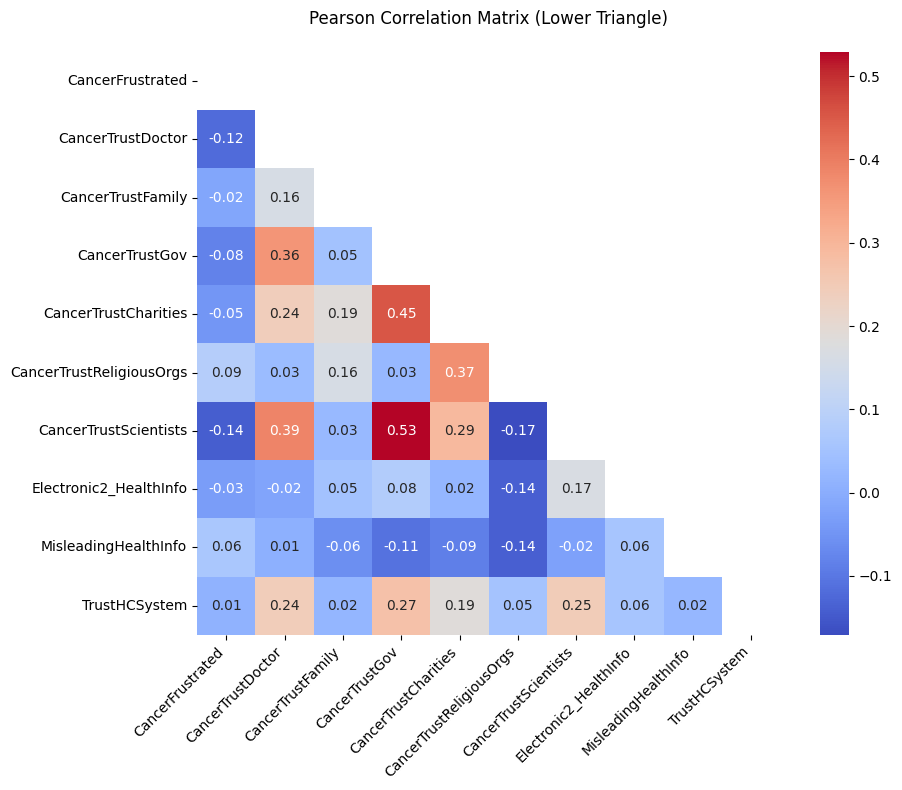

In [211]:
# Mask the upper triangle of the matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set the diagonal to NaN
np.fill_diagonal(correlation_matrix.values, np.nan)

# Plot the heatmap with the adjustments
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True,
    xticklabels=correlation_matrix.columns,
    yticklabels=correlation_matrix.columns
)
plt.title("Pearson Correlation Matrix (Lower Triangle)", pad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Trust in the Healthcare System (TrustHCSystem)
Most positively correlated variables:

CancerTrustScientists (0.245): Trust in scientists has the strongest correlation with trust in the healthcare system, suggesting that individuals who trust scientists also tend to trust the healthcare system.
CancerTrustGov (0.274): Trust in government correlates positively with trust in the healthcare system, which may reflect confidence in public institutions.
CancerTrustDoctor (0.242): Trust in doctors is another significant factor, emphasizing the importance of healthcare professionals in shaping trust in the system.
Weak correlations:

Other variables like MisleadingHealthInfo (0.022) and CancerTrustFamily (0.018) show negligible correlations, indicating they have little influence on trust in the healthcare system.
CancerTrustGov (Trust in Government)
Strong correlations:
CancerTrustScientists (0.529): People who trust scientists also strongly trust the government, potentially due to their reliance on similar evidence-based frameworks.
CancerTrustCharities (0.454): Trust in charities aligns closely with trust in government, possibly due to shared missions of public welfare.
CancerTrustDoctor (0.362): Trust in doctors also correlates with trust in the government, highlighting a general trust in institutional expertise.
CancerTrustReligiousOrgs
Negative correlations:
CancerTrustScientists (-0.171): Trust in scientists is negatively correlated with trust in religious organizations, possibly reflecting differing worldviews.
Electronic2_HealthInfo (-0.140): Those relying on electronic health information may be less trusting of religious organizations.
CancerFrustrated (Frustration with Cancer Information)
Weak negative correlations:
CancerTrustScientists (-0.143): People frustrated with cancer information tend to trust scientists less.
CancerTrustDoctor (-0.120): Frustration slightly decreases trust in doctors.
MisleadingHealthInfo
Weak negative correlations:
Correlation with most variables is weak and slightly negative, suggesting that individuals perceiving health information as misleading might generally distrust institutions but not strongly.
3. Interpretation for Key Variables
Trust in Scientists
Strongly correlated with multiple variables:
Trust in Government (0.529)
Trust in Doctors (0.390)
Trust in Charities (0.291)
These correlations suggest that trust in scientists forms part of a broader trust in professional and institutional credibility.
Electronic Health Information
Weak correlations with most variables:
The highest positive correlation is with CancerTrustScientists (0.166), implying a slight tendency for those who trust scientists to also rely on electronic health information.
4. Summary of Findings
Strong Predictors of Trust in the Healthcare System (TrustHCSystem):
CancerTrustScientists (0.245)
CancerTrustGov (0.274)
CancerTrustDoctor (0.242)
Minimal Influence:
Variables like MisleadingHealthInfo (0.023) and CancerTrustFamily (0.018) have negligible effects on trust in the healthcare system.
Trust in Scientists: Serves as a central variable strongly correlated with other types of trust, making it a potential driver for overall confidence in healthcare.

In [206]:
# First Basic Regression 
# Define the target variable and features
target = "TrustHCSystem"  # Dependent variable
features = [col for col in hints_cleaned.columns if col != target]

X = hints_cleaned[features]
y = hints_cleaned[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a regression model (Linear Regression here, you can swap it with others)
model = LinearRegression()  # Or RandomForestRegressor(), GradientBoostingRegressor(), etc.

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Display feature importance if using tree-based models
if hasattr(model, "feature_importances_"):
    importances = model.feature_importances_
    feature_importance_df = pd.DataFrame({
        "Feature": features,
        "Importance": importances
    }).sort_values(by="Importance", ascending=False)
    display(feature_importance_df)


Mean Squared Error: 0.18
R² Score: -0.04
